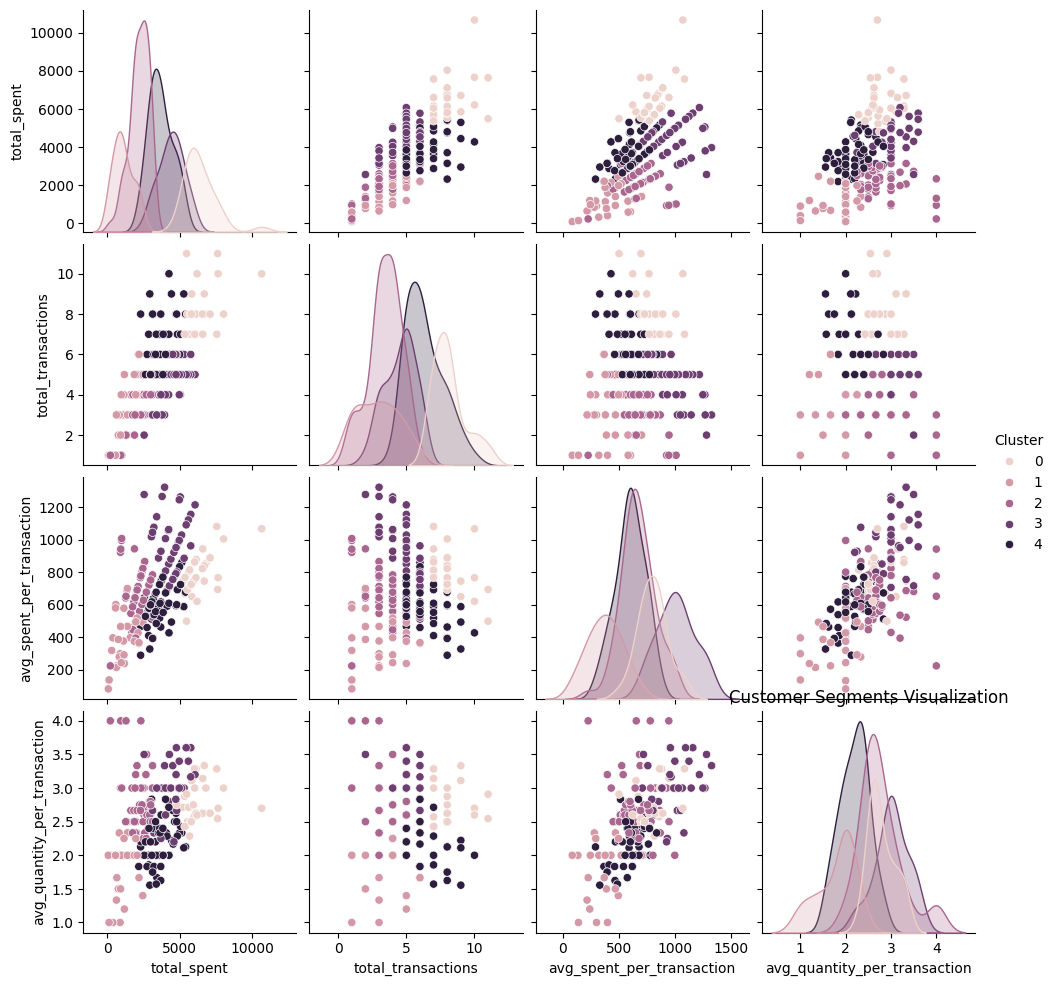

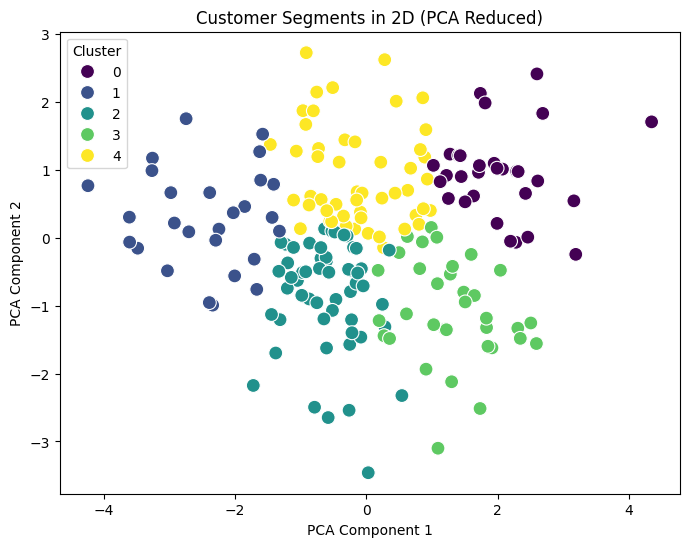

DB Index value: 1.0534768450920309


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
data_folder = "Data"
customers_file = f"{data_folder}/Customers.csv"
products_file = f"{data_folder}/Products.csv"
transactions_file = f"{data_folder}/Transactions.csv"

# Load datasets
customers_df = pd.read_csv(customers_file)
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)

# Merging customers and transactions data
customer_transactions_df = transactions_df.merge(customers_df[['CustomerID', 'Region']], on='CustomerID', how='left')

# Aggregating customer transaction data
customer_agg_df = customer_transactions_df.groupby(['CustomerID', 'Region']).agg(
    total_spent=('TotalValue', 'sum'),
    total_transactions=('TransactionID', 'count'),
    avg_spent_per_transaction=('TotalValue', 'mean'),
    avg_quantity_per_transaction=('Quantity', 'mean')
).reset_index()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_agg_df[['total_spent', 'total_transactions', 'avg_spent_per_transaction', 'avg_quantity_per_transaction']])

# Apply KMeans clustering (choose 5 clusters as an example)
kmeans = KMeans(n_clusters=5, random_state=42)
customer_agg_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate the Davies-Bouldin Index for cluster evaluation
db_index = davies_bouldin_score(scaled_data, customer_agg_df['Cluster'])

# Visualize the clusters using a pairplot
sns.pairplot(customer_agg_df, hue='Cluster', vars=['total_spent', 'total_transactions', 'avg_spent_per_transaction', 'avg_quantity_per_transaction'])
plt.title("Customer Segments Visualization")
plt.show()

# Visualize the clusters using a 2D scatter plot (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_agg_df['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments in 2D (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Save the results in a CSV
customer_agg_df.to_csv("Customer_Segments.csv", index=False)

# Output the DB Index value
print(f"DB Index value: {db_index}")
